In [4]:
#import face_recognition
from PIL import Image
from PIL.ExifTags import TAGS

In [39]:
def extract_data(filename):    
    img = Image.open(filename)
    print(img._getexif())
    
# extract_data("IMAG0541.jpg")
extract_data("IMAG0542.jpg")

{36864: b'0220', 37121: b'\x01\x02\x03\x00', 37378: (2000000, 1000000), 36867: '2015:04:11 12:26:37', 36868: '2015:04:11 12:26:37', 40965: 588, 40960: b'0100', 37383: 2, 37385: 0, 37386: (297, 100), 40962: 1552, 271: 'HTC\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 272: 'HTC Desire X dual sim\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', 531: 1, 37380: (0, 6), 282: (72, 1), 283: (72, 1), 33437: (2000000, 1000000), 40963: 2592, 40961: 1, 33434: (319, 

In [1]:
import face_recognition

In [40]:
# image = face_recognition.load_image_file("IMAG0541.jpg")
image = face_recognition.load_image_file("IMAG0542.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)

[(804, 769, 958, 614), (1282, 835, 1505, 613)]


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

[-0.13808826  0.01253082 -0.04610282 -0.0919483  -0.098473   -0.06028876
 -0.01467393 -0.11515833  0.11023418 -0.13429159  0.1677431  -0.03061164
 -0.2313641  -0.04074292 -0.02176254  0.1830397  -0.13068093 -0.08620659
 -0.1061137  -0.01975476  0.02182652  0.0985026  -0.03185693  0.02003503
 -0.08044243 -0.3271049  -0.08747181 -0.06605837 -0.06046719  0.00915686
  0.01954775  0.17416692 -0.17218608 -0.03230657  0.04016465  0.07052015
 -0.06619979 -0.00750158  0.18837827  0.10853138 -0.21923693 -0.06483909
  0.11471305  0.26820651  0.14488697 -0.02868204 -0.00431488 -0.04276983
  0.09854641 -0.25221214 -0.05089008  0.10321505  0.10597695  0.06907164
  0.10560748 -0.07464501  0.0756285   0.09371547 -0.29145205 -0.01427538
  0.00906743 -0.06494515 -0.05016615 -0.0682151   0.24712436  0.11785156
 -0.11690792 -0.08192801  0.20373419 -0.16110191 -0.08948758  0.03891395
 -0.09442578 -0.21547987 -0.30876085 -0.0122111   0.31525049  0.14790724
 -0.12383292  0.06296457  0.00486314 -0.15519278  0

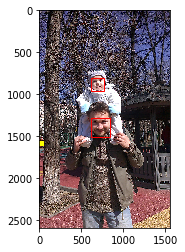

In [41]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
for l in face_locations:
    x = l[3]
    y = l[0]
    w = l[2]-l[0]
    h = l[1]-l[3]
    rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    crop_image = Image.fromarray(image).crop((x,y,x+w,y+h))
    crop_image.save("{}.jpg".format(sum(l)))

    print(face_recognition.face_encodings(np.array(crop_image))[0])
plt.show()

In [45]:
me = face_recognition.load_image_file("1174.jpg")
maria = face_recognition.load_image_file("1838.jpg")
x = face_recognition.load_image_file("4235.jpg")

me_encoding = face_recognition.face_encodings(me)[0]
maria_encoding = face_recognition.face_encodings(maria)[0]
unknown_encoding = face_recognition.face_encodings(x)[0]

results = face_recognition.compare_faces([me_encoding, maria_encoding], unknown_encoding)
print(results)

[True, False]


In [46]:
from PIL.ExifTags import TAGS, GPSTAGS

def get_exif_data(image):
    """Returns a dictionary from the exif data of an PIL Image item. Also converts the GPS Tags"""
    exif_data = {}
    info = image._getexif()
    if info:
        for tag, value in info.items():
            decoded = TAGS.get(tag, tag)
            if decoded == "GPSInfo":
                gps_data = {}
                for t in value:
                    sub_decoded = GPSTAGS.get(t, t)
                    gps_data[sub_decoded] = value[t]

                exif_data[decoded] = gps_data
            else:
                exif_data[decoded] = value

    return exif_data

def _get_if_exist(data, key):
    if key in data:
        return data[key]
		
    return None
	
def _convert_to_degress(value):
    """Helper function to convert the GPS coordinates stored in the EXIF to degress in float format"""
    d0 = value[0][0]
    d1 = value[0][1]
    d = float(d0) / float(d1)

    m0 = value[1][0]
    m1 = value[1][1]
    m = float(m0) / float(m1)

    s0 = value[2][0]
    s1 = value[2][1]
    s = float(s0) / float(s1)

    return d + (m / 60.0) + (s / 3600.0)

def get_lat_lon(exif_data):
    """Returns the latitude and longitude, if available, from the provided exif_data (obtained through get_exif_data above)"""
    lat = None
    lon = None

    if "GPSInfo" in exif_data:		
        gps_info = exif_data["GPSInfo"]

        gps_latitude = _get_if_exist(gps_info, "GPSLatitude")
        gps_latitude_ref = _get_if_exist(gps_info, 'GPSLatitudeRef')
        gps_longitude = _get_if_exist(gps_info, 'GPSLongitude')
        gps_longitude_ref = _get_if_exist(gps_info, 'GPSLongitudeRef')

        if gps_latitude and gps_latitude_ref and gps_longitude and gps_longitude_ref:
            lat = _convert_to_degress(gps_latitude)
            if gps_latitude_ref != "N":                     
                lat = 0 - lat

            lon = _convert_to_degress(gps_longitude)
            if gps_longitude_ref != "E":
                lon = 0 - lon

    return lat, lon

In [95]:
import os.path, time

def extract_photo_data(filename):
    image = Image.open(filename)
    face_locations = face_recognition.face_locations(np.array(image))
    
    faces = {}
    for l in face_locations:
        try:
            x = l[3]
            y = l[0]
            w = l[2]-l[0]
            h = l[1]-l[3]

            crop_image = image.crop((x,y,x+w,y+h))

            faces["-".join(map(str,l))] = list(face_recognition.face_encodings(np.array(crop_image))[0])
        except Exception as e:
            print("Failed to encode face for", filename, e)
            
        
    exif_data = get_exif_data(image)    
    
    geo = get_lat_lon(exif_data)  
    if 'DateTimeOriginal' in exif_data.keys():
        timestamp = exif_data['DateTimeOriginal']
    else:
        timestamp = time.ctime(os.path.getmtime(filename))
        
    return {"source_id": filename, "faces": faces, "geo": geo, "time": timestamp}

print(extract_photo_data(r"E:\Фотографии\x_7ab128c3.jpg"))

Failed to encode face for E:\Фотографии\x_7ab128c3.jpg list index out of range
{'faces': {'88-278-163-204': [-0.17996689677238464, 0.083787545561790466, -0.00044449511915445328, -0.074343740940093994, -0.10005518794059753, -0.068563513457775116, -0.095229342579841614, -0.0786290243268013, 0.15549859404563904, 0.0096513815224170685, 0.10790997743606567, -0.042516857385635376, -0.2511412501335144, -0.033471517264842987, -0.066855140030384064, 0.075668610632419586, -0.19881570339202881, -0.17928408086299896, 0.043852031230926514, -0.052233606576919556, 0.066335417330265045, 0.015100513584911823, 0.0028240506071597338, 0.12740354239940643, -0.14667427539825439, -0.3289208710193634, -0.12251796573400497, -0.15948395431041718, -0.042851567268371582, -0.061064742505550385, 0.010141345672309399, 0.089787766337394714, -0.15605603158473969, -0.081405229866504669, 0.075338684022426605, 0.11876052618026733, -0.030465152114629745, 0.0044034942984580994, 0.21537153422832489, 0.072821766138076782, -0

In [101]:
from pymongo import MongoClient

client = MongoClient()

db = client.time_line

photo_collection = db.photo_collection

In [103]:
import os
import pymongo
from os import listdir
from os.path import isfile
from os import walk


def dump(mypath):
    last_data = list(photo_collection.find().limit(1).sort("_id",pymongo.DESCENDING))
    found = len(last_data) == 0
    
    if len(last_data) > 0:
        print("Last data:", last_data[0]['source_id'])
    
    iteration = 0
    for (dirpath, dirnames, filenames) in walk(mypath):
        for filename in filenames:
            source_id = os.path.join(dirpath, filename)
            
            if filename.upper().endswith('.JPG') or filename.upper().endswith('.JPEG'):
                if found:
                    try:
                        print("Process", source_id)
                        data = extract_photo_data(os.path.join(dirpath, filename))
                        data_id = photo_collection.insert_one(data).inserted_id
                        print("Inserted", iteration, data['source_id'], ", faces found", len(data['faces']))
                        iteration += 1

                        if iteration > 100:
                            return      
                    except Exception as e:
                        print("Failed to persist", source_id, e)
                elif source_id == last_data[0]['source_id']:
                    found = True  
                else:
                    print("Skip persisted", source_id)
            else:
                print("Skip", source_id)
            
        
dump("E:\Фотографии")

Last data: E:\Фотографии\2013-06-03 001\IMG_2446.JPG
Skip E:\Фотографии\09-03-2015_17-22-15.zip
Skip persisted E:\Фотографии\1.jpg
Skip persisted E:\Фотографии\2.jpg
Skip persisted E:\Фотографии\45189770.jpg
Skip persisted E:\Фотографии\64943406.jpg
Skip persisted E:\Фотографии\64943414.jpg
Skip persisted E:\Фотографии\64943430.jpg
Skip persisted E:\Фотографии\brp1.jpg
Skip persisted E:\Фотографии\brp2.jpg
Skip E:\Фотографии\desktop.ini
Skip persisted E:\Фотографии\form.jpg
Skip E:\Фотографии\img044.pdf
Skip E:\Фотографии\img045.pdf
Skip E:\Фотографии\Thumbs.db
Skip persisted E:\Фотографии\wheat-field-with-cypresses.jpg
Skip E:\Фотографии\xxx.zip
Skip persisted E:\Фотографии\x_7ab128c3.jpg
Skip persisted E:\Фотографии\виза.jpg
Skip persisted E:\Фотографии\св_о_браке.jpg
Skip persisted E:\Фотографии\скан_пасп.jpg
Skip persisted E:\Фотографии\09-03-2015_17-22-15\DSC01200.JPG
Skip persisted E:\Фотографии\09-03-2015_17-22-15\DSC01278.JPG
Skip persisted E:\Фотографии\09-03-2015_17-22-15\DSC

Skip persisted E:\Фотографии\2013-04-01 001\f23d4256d8dd450c80a6e6b46b0be1ba.jpg
Skip persisted E:\Фотографии\2013-04-01 001\f52fae99a95f4dfdb066cba5079a9583.jpg
Skip persisted E:\Фотографии\2013-04-01 001\f96289f70a2c4e09858dcfda682ad291_48.jpg
Skip persisted E:\Фотографии\2013-04-01 001\m2855931c.jpg
Skip persisted E:\Фотографии\2013-04-01 001\m4a279c60.jpg
Skip persisted E:\Фотографии\2013-04-01 001\mfc39a627.jpg
Skip persisted E:\Фотографии\2013-04-01 001\s2855931c.jpg
Skip persisted E:\Фотографии\2013-04-01 001\s4a279c60.jpg
Skip persisted E:\Фотографии\2013-04-01 001\sfc39a627.jpg
Skip E:\Фотографии\2013-04-01 001\Thumbs.db
Skip E:\Фотографии\2013-04-01 001\userpic_default.gif
Skip E:\Фотографии\2013-04-01 001\userpic_default_48.gif
Skip persisted E:\Фотографии\2013-06-03 001\IMG_2388.JPG
Skip persisted E:\Фотографии\2013-06-03 001\IMG_2412.JPG
Skip persisted E:\Фотографии\2013-06-03 001\IMG_2422.JPG
Skip persisted E:\Фотографии\2013-06-03 001\IMG_2423.JPG
Skip persisted E:\Фотог

Inserted 49 E:\Фотографии\2013-06-03 001\IMG_2537.JPG , faces found 0
Process E:\Фотографии\2013-06-03 001\IMG_2538.JPG
Inserted 50 E:\Фотографии\2013-06-03 001\IMG_2538.JPG , faces found 1
Process E:\Фотографии\2013-06-03 001\IMG_2539.JPG
Inserted 51 E:\Фотографии\2013-06-03 001\IMG_2539.JPG , faces found 1
Process E:\Фотографии\2013-06-03 001\IMG_2540.JPG
Failed to encode face for E:\Фотографии\2013-06-03 001\IMG_2540.JPG list index out of range
Failed to encode face for E:\Фотографии\2013-06-03 001\IMG_2540.JPG list index out of range
Inserted 52 E:\Фотографии\2013-06-03 001\IMG_2540.JPG , faces found 0
Process E:\Фотографии\2013-06-03 001\IMG_2541.JPG
Inserted 53 E:\Фотографии\2013-06-03 001\IMG_2541.JPG , faces found 0
Process E:\Фотографии\2013-06-03 001\IMG_2543.JPG
Failed to encode face for E:\Фотографии\2013-06-03 001\IMG_2543.JPG list index out of range
Inserted 54 E:\Фотографии\2013-06-03 001\IMG_2543.JPG , faces found 1
Process E:\Фотографии\2013-06-03 001\IMG_2544.JPG
Inse